## Gold Price Prediction using Machine Learning

Dataset taken from https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data collection and processing

In [3]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('data/gld_price_data.csv')

In [4]:
# Print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# Print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# Getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:
1. Positive correlation
2. Negative correlation

In [11]:
correlation = gold_data.corr()

C:\Users\andre\AppData\Local\Temp\ipykernel_17384\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


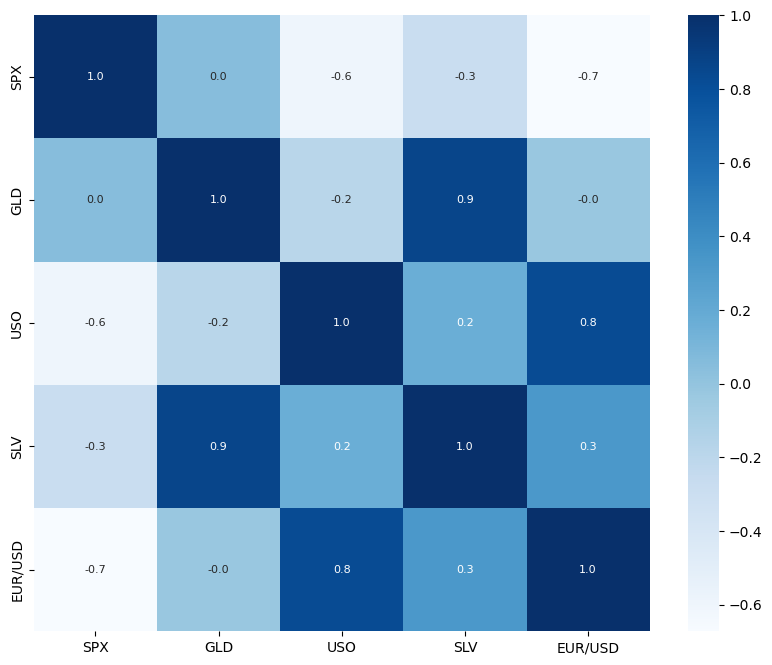

In [16]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues');

In [17]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_17384\794491856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

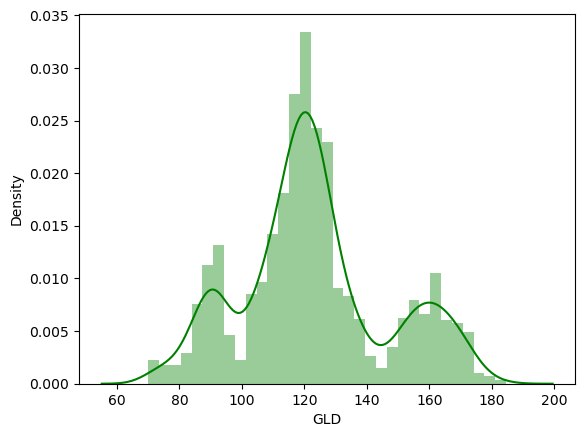

In [22]:
# Check the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

### Splitting the features and target

In [23]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [24]:
print(X, y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting into training data and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model training: RandomForestRegressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# Training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

### Model evaluation

In [28]:
# Predicting on test data
test_data_prediction = regressor.predict(X_test)

In [29]:
test_data_prediction

array([168.52799942,  81.72120024, 115.94050024, 127.71810084,
       120.81320103, 154.64889794, 150.56279812, 126.11510055,
       117.60699877, 125.87380062, 116.61040099, 172.04930053,
       141.57789888, 167.90339856, 115.10579987, 117.50120055,
       138.17360305, 170.1718006 , 159.60010394, 156.79850038,
       155.0155999 , 124.87209999, 176.37279884, 157.23600377,
       125.1583005 ,  93.91369988,  77.87230003, 120.47060006,
       119.12859976, 167.58979961,  88.26620049, 125.2195004 ,
        91.13130062, 117.71960014, 121.15529928, 136.45920078,
       115.4666012 , 114.98720091, 147.99969955, 107.34710139,
       104.04890215,  87.07759786, 126.45360087, 117.94200037,
       153.20609892, 119.55060001, 108.44229987, 108.1904982 ,
        93.16240052, 127.12999752,  74.90870034, 113.73499916,
       121.53799995, 111.36649916, 118.89999887, 120.65439917,
       159.77490074, 168.57300124, 146.97009655,  85.8559984 ,
        94.43730049,  86.86719879,  90.65139998, 118.96

In [31]:
# R^2 error evaluation
error_score = metrics.r2_score(y_test, test_data_prediction)

In [33]:
print(f'R^2 error:', error_score)

R^2 error: 0.9884153794236692


### Compare the actual values and predicted values in a plot

In [35]:
y_test = list(y_test)

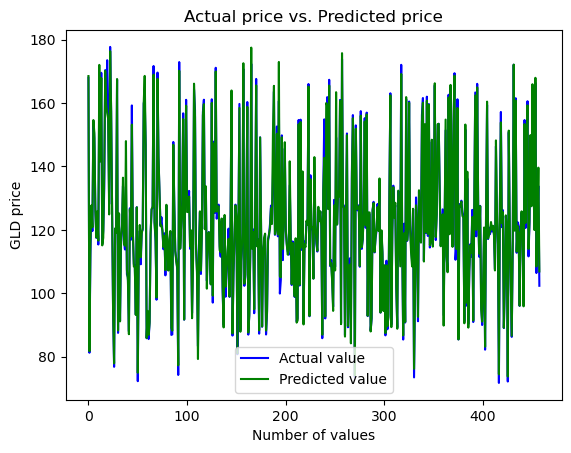

In [36]:
plt.plot(y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual price vs. Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend();